In [22]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
# 数据集中包含了8124个样本和22个变量（如蘑菇的颜色、形状、光滑度等）。每一种都被分为绝对可食用的，绝对有毒的，或者具有未知的可食性。该数据集是探究机器学习分类算法算法不可多得的一个优质数据集。
baseUrl="C:\\Users\\71781\\Desktop\\2020\\ML-20200422\\bayes\\"
mushrooms=pd.read_csv(baseUrl+"mushrooms.csv")
mushrooms.columns=['class','cap-shape','cap-surface','cap-color','ruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
pd.set_option("display.max_columns",500) #让所有列都能加载出来
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [24]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [25]:
# 以菌盖的颜色为例，绘制直方图
cap_colors = mushrooms['cap-color'].value_counts() #计算各种颜色的数量
m_height = cap_colors.values.tolist()  #将数组转化为列表形式
cap_colors.axes 
cap_color_labels = cap_colors.axes[0].tolist()  #将各颜色的名称作为横坐标
print(m_height)
print(cap_color_labels)

[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]
['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'r', 'u']


In [26]:
# 定义一个函数，该函数在直方图的每个bar上面附上具体的数值
def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

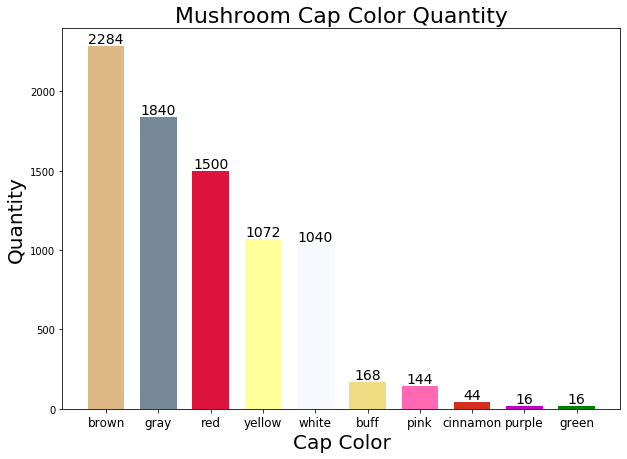

In [27]:
ind = np.arange(10)  #因为有10个颜色，所以做十个bar
width = 0.7    #设置bar的宽度

#设置颜色
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#设置画布大小
fig, ax = plt.subplots(figsize=(10,7)) 
#设置bar的具体参数
cap_colors_bars = ax.bar(ind, m_height , width, color=colors)

#设置横纵坐标轴和标题
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
                  
#利用上面这个函数，在每个bar上面附上具体的数值
autolabel(cap_colors_bars)        
plt.show() 


[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


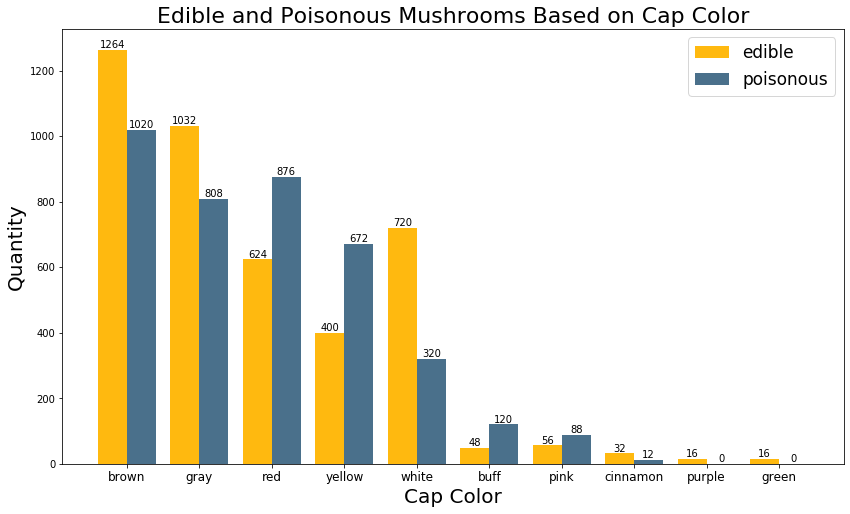

In [28]:
#创建两个列表，分别为各颜色有毒蘑菇的数量和个颜色食用菌的数量
poisonous_cc = [] 
edible_cc = []    

for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index) #各颜色蘑菇总数
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index) #各颜色食用菌的数量
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles) #总减食用得到有毒的数量
print(edible_cc)
print(poisonous_cc)
                        
                        
width = 0.4
fig, ax = plt.subplots(figsize=(14,8))
edible_bars = ax.bar(ind, edible_cc , width, color='#FFB90F') #画食用菌的bars
#有毒菌在食用菌右侧移动width个单位
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4A708B') 

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [30]:
X=mushrooms.drop('class',axis=1) #Predictors
y=mushrooms['class'] #Response
#X.head()

In [31]:
#这里采用用哑变量编码，为的是后面能更好的计算特征的各属性的重要性，并且避免数值变量分类时偏向于数值大的属性
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,ruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,stalk-shape_1,stalk-root_1,stalk-root_2,stalk-root_3,stalk-root_4,stalk-surface-above-ring_1,stalk-surface-above-ring_2,stalk-surface-above-ring_3,stalk-surface-below-ring_1,stalk-surface-below-ring_2,stalk-surface-below-ring_3,stalk-color-above-ring_1,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_4,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

RF_features= RandomForestClassifier()

#可以通过定义树的各种参数，限制树的大小，防止出现过拟合现象
parameters = {'n_estimators': [100,200,500], 
              'criterion': ['gini'],        
              'max_depth': range(5,10), 
              'min_samples_split': [2,4,6,8],
              'min_samples_leaf': [2,4,6,8,10]
             }

#自动调参，通过交叉验证确定最优参数。
grid_RF = GridSearchCV(RF_features,parameters,cv=10,n_jobs=1)
grid_RF = grid_RF.fit(X_train,y_train)

RF_features = grid_RF.best_estimator_
RF_features.fit(X_train,y_train)

y_pred= RF_features.predict(X_test)
print(RF_features)


In [ ]:

importance=RF_features.feature_importances_
series=pd.Series(importance,index=X_train.columns)
plt.figure(figsize = (20,50))
series.sort_values(ascending=True).plot('barh')
plt.show()

In [ ]:
report(y_test,y_test)